# Improved Quantile Normalization 
This notebook overviews the results of the improved quantile normalization algorithm that correctly treats missing data.

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.style.use('ggplot')

import pandas as pd
import numpy as np
from copy import deepcopy

def load_data(data_type):
    import numpy as np
    import matplotlib.pyplot as plt
    # %matplotlib inline
    import matplotlib
    matplotlib.style.use('ggplot')
    from clustergrammer import Network
    from copy import deepcopy

    filename = '../lung_cellline_3_1_16/lung_cl_all_ptm/precalc_processed/' + \
             data_type + '.txt'

    # load file and export dataframe
    net = deepcopy(Network())
    net.load_file(filename)
    # net.swap_nan_for_zero()
    tmp_df = net.dat_to_df()
    df = tmp_df['mat']

    return df

In [36]:
# load data
###############

# filtering
################
# data_type = 'ptm45_filter_none'
# data_type = 'ptm45_filter_col-qn'
# data_type = 'ptm45_filter_col-qn_row-zscore'

# no filtering
################
# data_type = 'ptm45_none'
data_type = 'ptm45_col-iqn'
# data_type = 'ptm45_col-qn_row-zscore'


# nan and zero version of the data
df_nans = load_data(data_type)

rows = df_nans.index.tolist()

new_rows = []
for i in range(len(rows)):
    inst_row = rows[i]
    inst_row = inst_row + str(i)
    new_rows.append(inst_row)

df_nans.index = new_rows
    

df_zeros = deepcopy(df_nans)
df_zeros[np.isnan(df_zeros)] = 0

cols = df_zeros.columns.tolist()

In [37]:
rows = df_nans.index.tolist()
cols = df_nans.columns.tolist()

print(len(rows))
print(len(cols))

print('\n')

rows = list(set(rows))
cols = list(set(cols))


print(len(rows))
print(len(cols))

8468
45


8468
45


In [38]:
col_num = 0
series_nans = df_nans[cols[col_num]]
series_zeros = df_zeros[cols[col_num]]

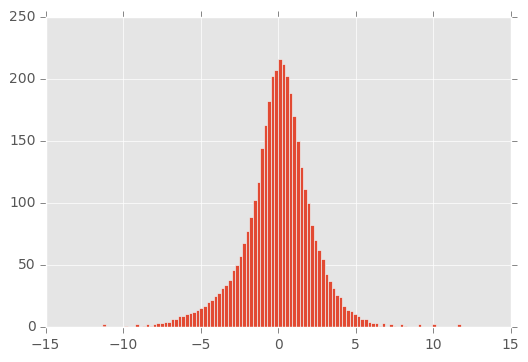

In [39]:
series_nans.hist(bins=100)

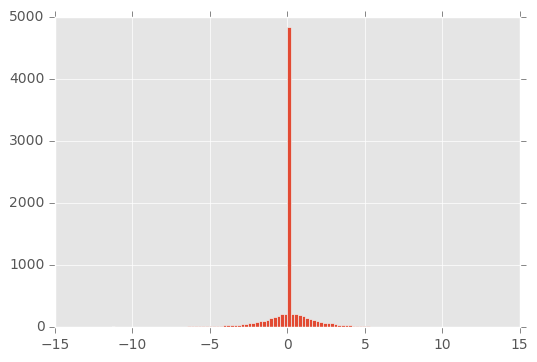

In [40]:
series_zeros.hist(bins=100)

## Scatterplot
This is a quick look at a scatterplot of PTM values from two cell lines with and withouth swapping nans for zeros

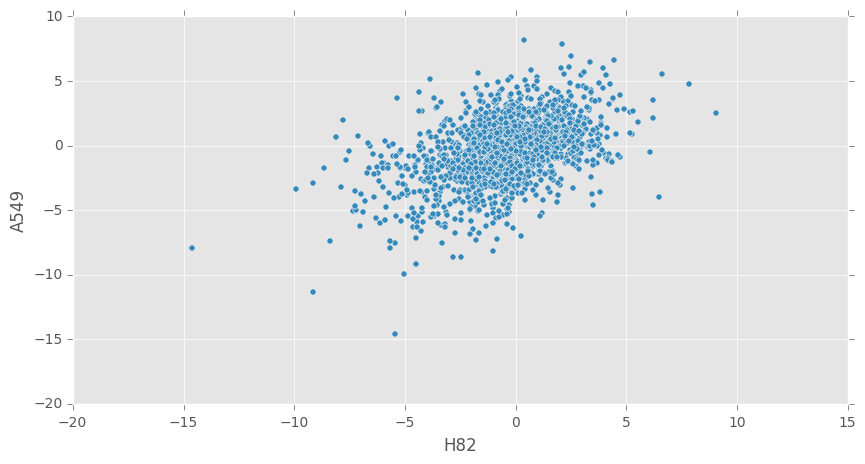

In [41]:
df_nans.plot(kind='scatter', figsize=(10,5), x=cols[5], y=cols[44])

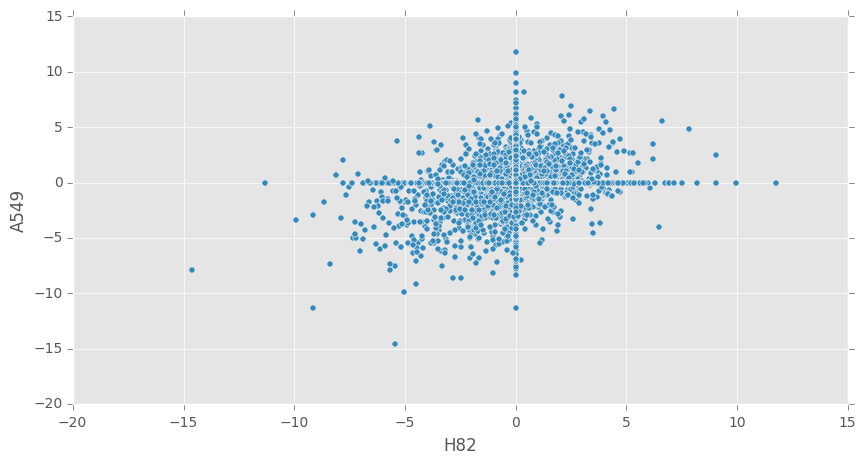

In [42]:
df_zeros.plot(kind='scatter', figsize=(10,5), x=cols[5], y=cols[44])

## Box plot
When nans are replaced with zeros, then zeros dominate the data.

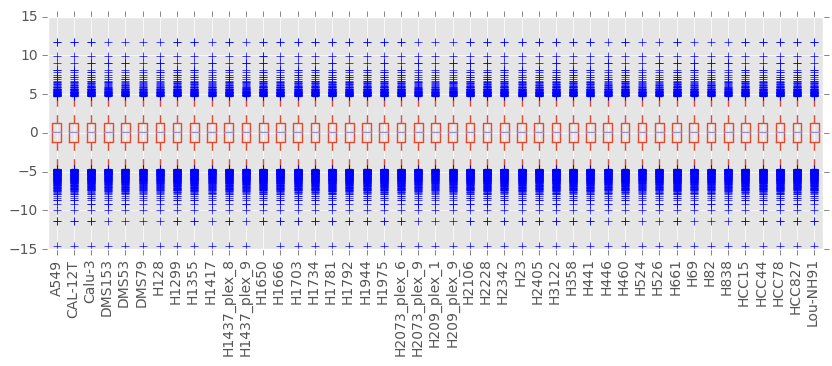

In [43]:
df_nans.plot(kind='box', figsize=(10,3), rot=90)

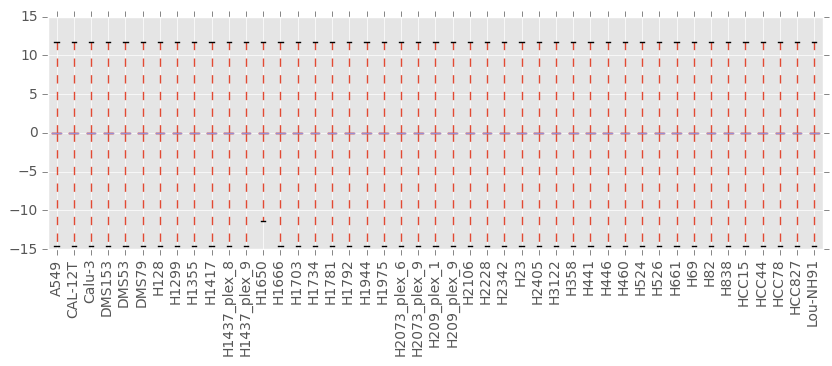

In [44]:
# adding zeros makes distributions narrow around zero
df_zeros.plot(kind='box', figsize=(10,3), rot=90)

In [45]:
df_nans.shape

(8468, 45)

In [46]:
from clustergrammer_widget import *
from copy import deepcopy

In [47]:
net = deepcopy(Network())
tmp_df = {}
tmp_df['mat'] = df_nans
net.df_to_dat(tmp_df)
net.swap_nan_for_zero()
net.normalize(axis='row', norm_type='zscore', keep_orig=True)
net.filter_N_top('row', 250, rank_type='sum')
exp_df = net.dat_to_df()


In [48]:
net.make_clust()

In [49]:
# view heatmap of data 
clustergrammer_notebook(network = net.export_net_json())